In [1]:
from matplotlib import pyplot as plt
import numpy as np

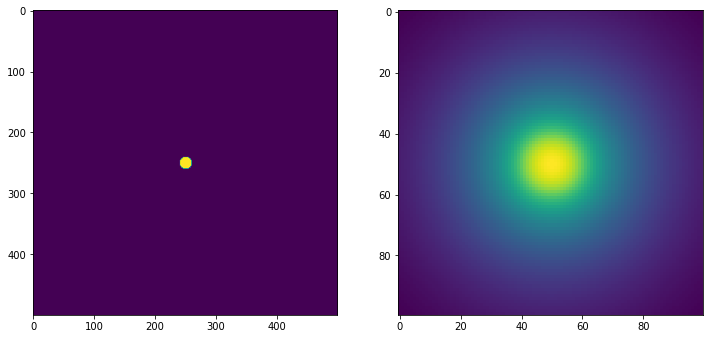

In [2]:
N,M = 500,500
h,eps,r = 1/max(N, M),1e-6,1e10
Grid = np.zeros((N, M))
ux1,ux2,uy1,uy2 = np.zeros(M)+0,np.zeros(M)+0,np.zeros(N)+0,np.zeros(N)+0
Grid[0],Grid[N-1],Grid[:, 0],Grid[:, M-1] = ux1,ux2,uy1,uy2


def f(x, y):
    A = (x-0.5)*(x-0.5)+(y-0.5)*(y-0.5)<0.02**2
    return 50 *  np.array(A)

def f2(x, y):
    return (x+y)**3

X,Y = np.meshgrid(np.linspace(0, 1, M, endpoint=False), np.linspace(0, 1, N, endpoint=False))

while r > eps:
    r = np.max(np.abs(Grid[1:N-1,1:M-1]-(Grid[2:N,1:M-1]+Grid[0:N-2,1:M-1]+Grid[1:N-1,2:M]+Grid[1:N-1,0:M-2])/4-f(X[1:N-1,1:M-1],Y[1:N-1,1:M-1])*h**2/4))
    Grid[1:N-1,1:M-1] = (Grid[2:N,1:M-1]+Grid[0:N-2,1:M-1]+Grid[1:N-1,2:M]+Grid[1:N-1,0:M-2])/4+f(X[1:N-1,1:M-1],Y[1:N-1,1:M-1])*h**2/4
    
fig, axes = plt.subplots(1, 2)

axes[0].imshow((f(X,Y)))
axes[1].imshow(Grid[200:300, 200:300])

fig.set_figwidth(12)    
fig.set_figheight(6) 